You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:
Pregnancies: Number of times pregnant (integer)

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

BloodPressure: Diastolic blood pressure (mm Hg) (integer)

SkinThickness: Triceps skin fold thickness (mm) (integer)

Insulin: 2-Hour serum insulin (mu U/ml) (integer)

BMI: Body mass index (weight in kg/(height in m)^2) (float)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes

based on family history) (float)

Age: Age in years (integer)

Outcome : Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Question 1 : Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: xlabel='Outcome', ylabel='Value counts'>

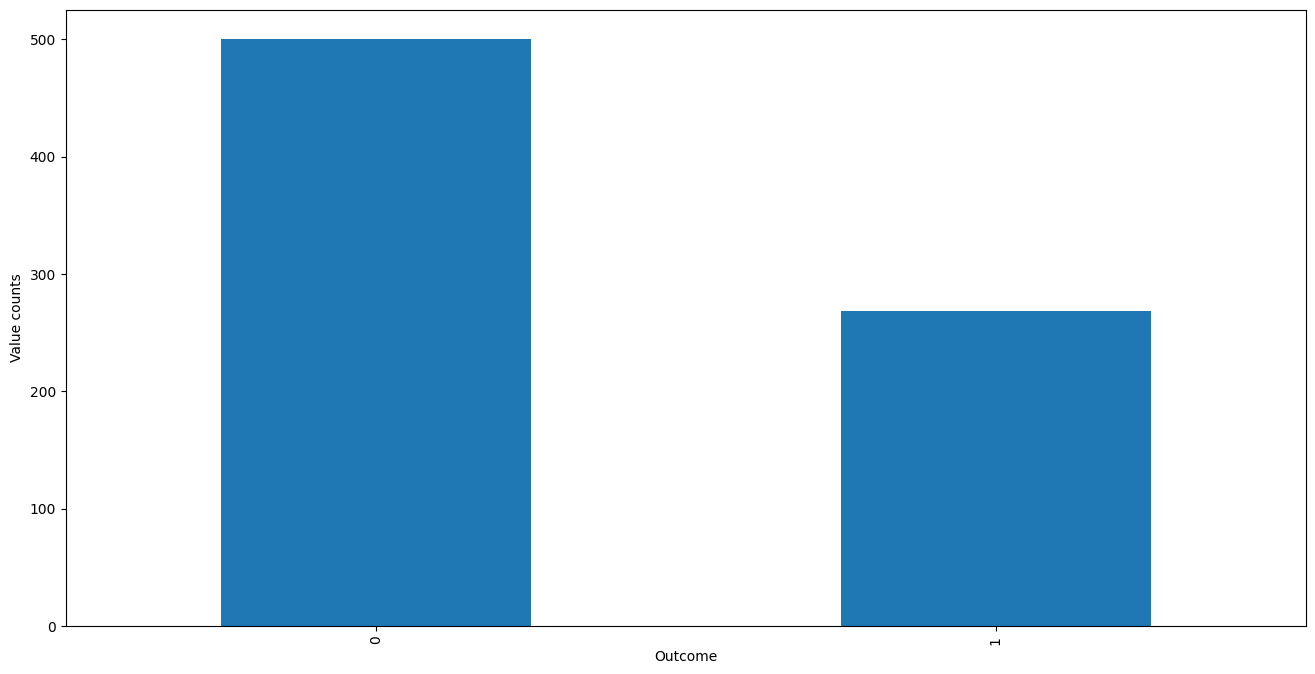

In [5]:
df['Outcome'].value_counts().plot(kind='bar',
                                  xlabel='Outcome',
                                  ylabel='Value counts',
                                  figsize=(16,8))

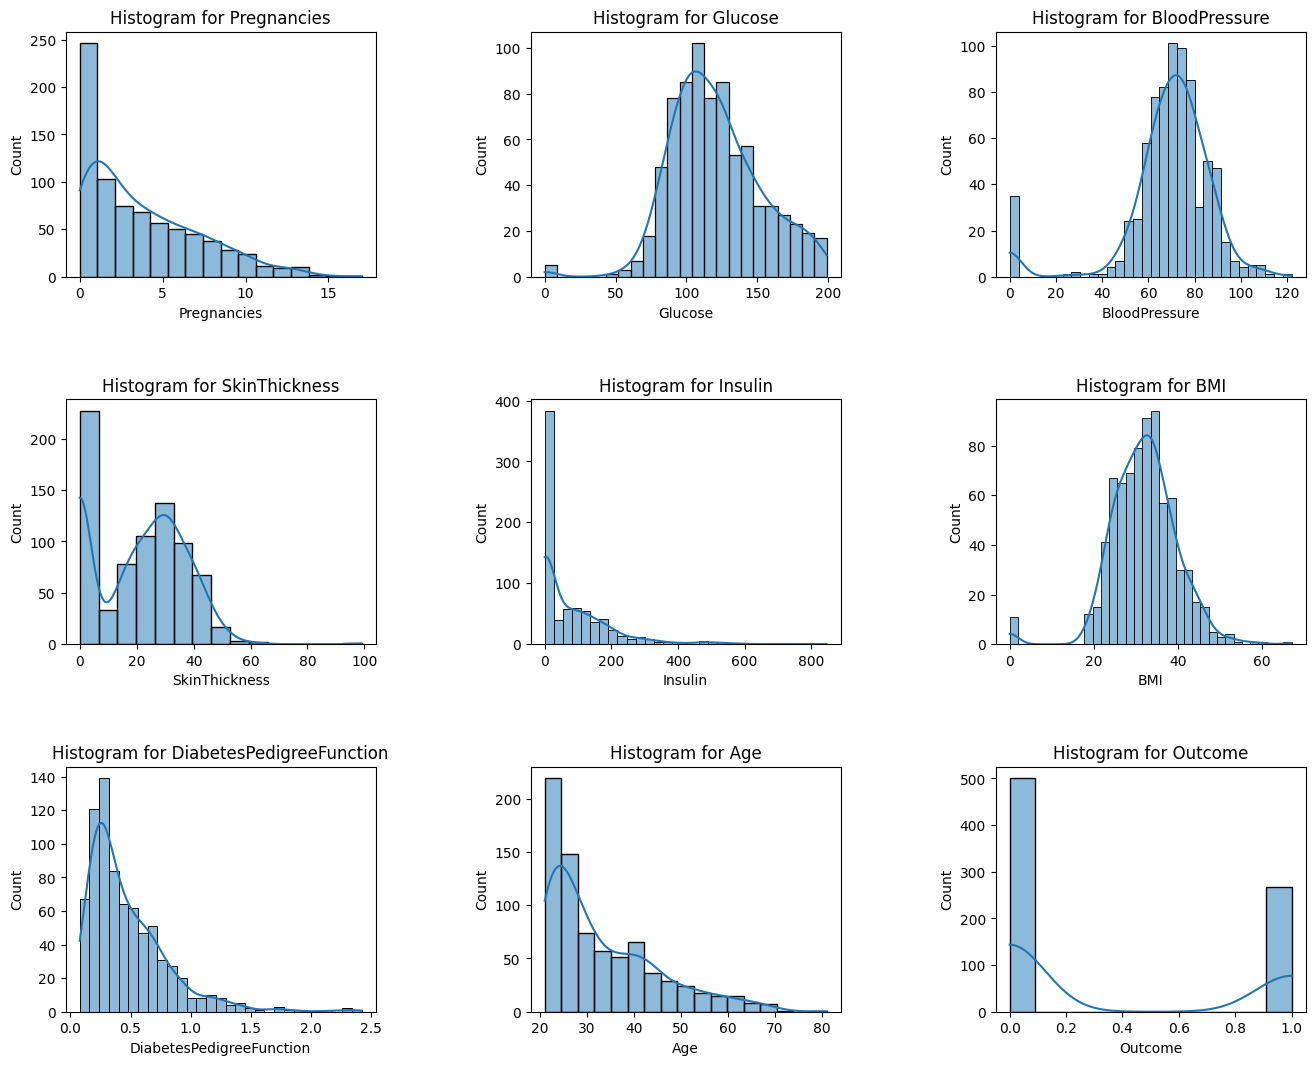

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize counter for subplots
x = 1
plt.figure(figsize=(16,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
for i in df.columns:
    plt.subplot(3,3,x)
    x = x+1
    sns.histplot(data=df,x=i,kde='true')
    plt.title(f'Histogram for {i}')
plt.show()

Insights for above Univariate Analysis

Glucose feature has 0 values which does not make sense, need to replace 0 values with median.

Skin Thickness feature also has 0 values which also does not make sense, need to replace 0 values with median.

Insulin feature also has 0 values which does not make sense, replace this 0 values with median.

BMI feature also has 0 values which does not make sense, replace this 0 values with median.

Blood Pressure feature has 0 values which does not make sense, replace this 0 values with median.


In [7]:
df.groupby(by='Outcome').describe().T

Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean     3.298000    4.865672
            std      3.017185    3.741239
            min      0.000000    0.000000
            25%      1.000000    1.750000
...                       ...         ...
Age         min     21.000000   21.000000
            25%     23.000000   28.000000
            50%     27.000000   36.000000
            75%     37.000000   44.000000
            max     81.000000   70.000000

[64 rows x 2 columns]

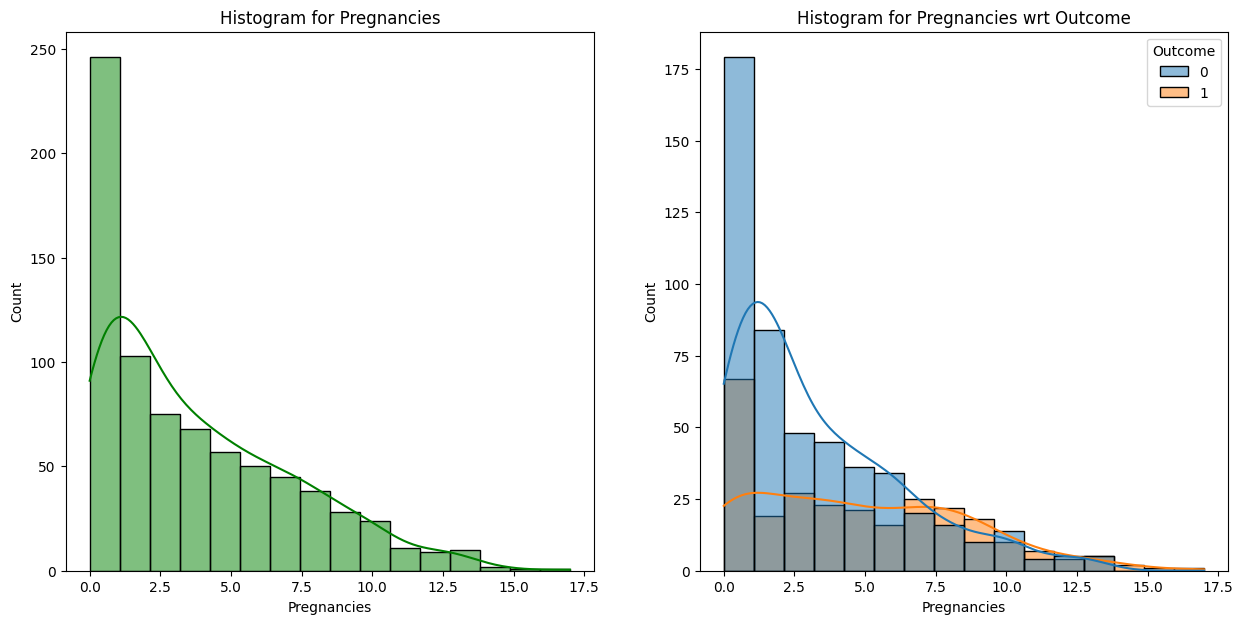

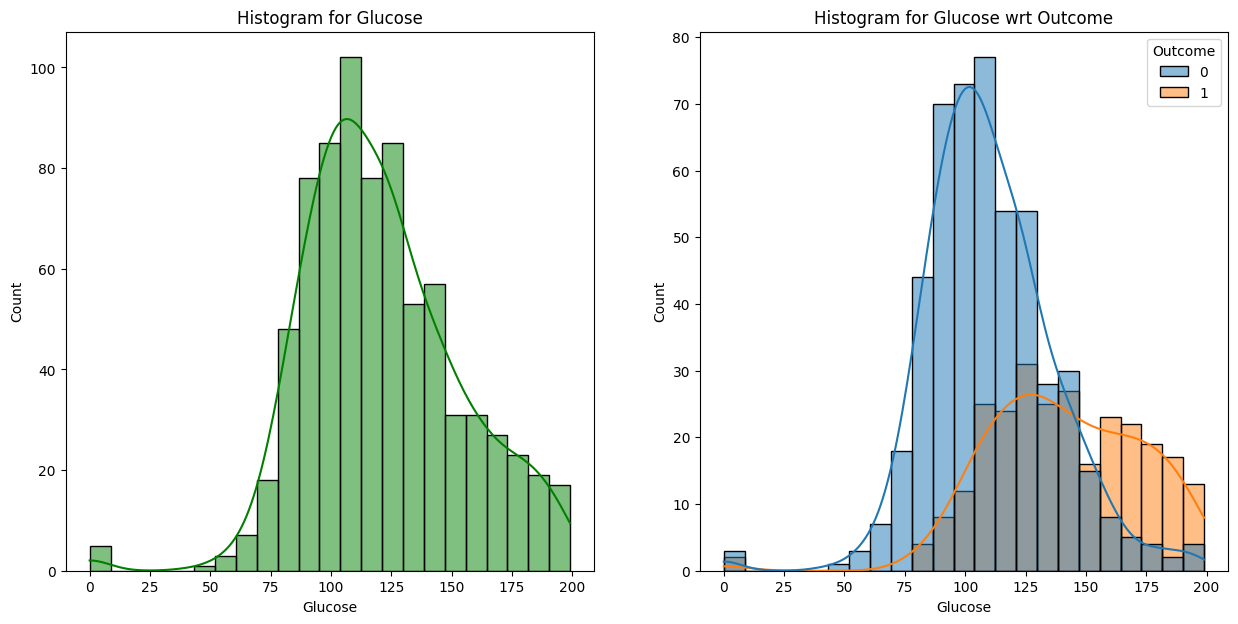

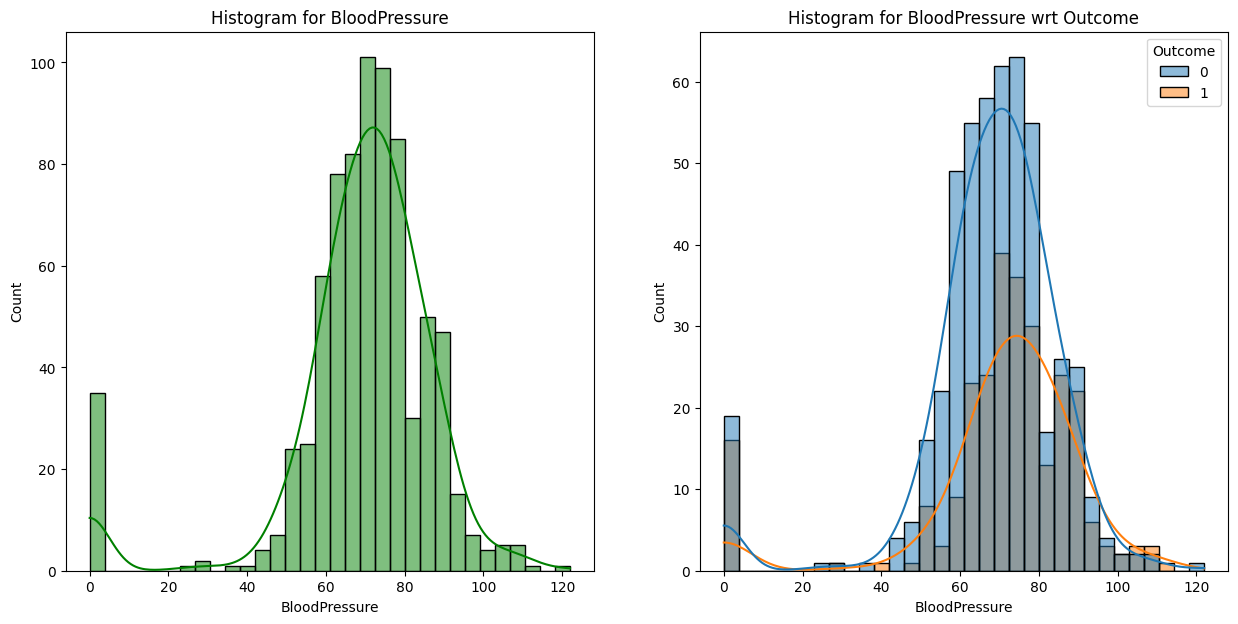

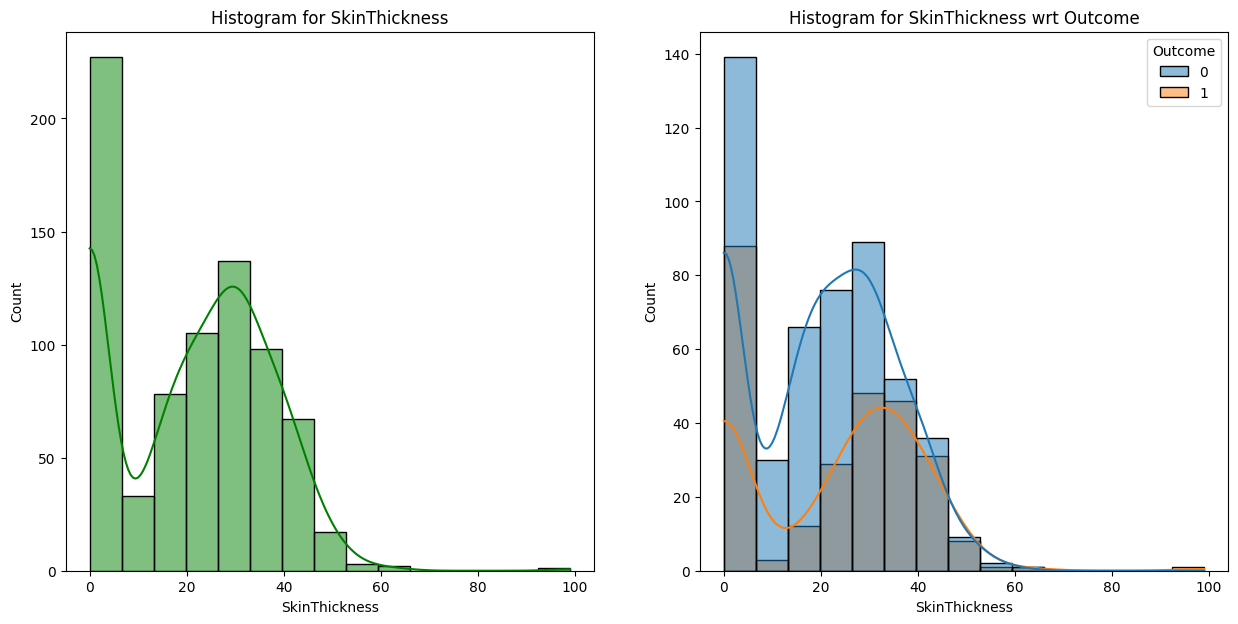

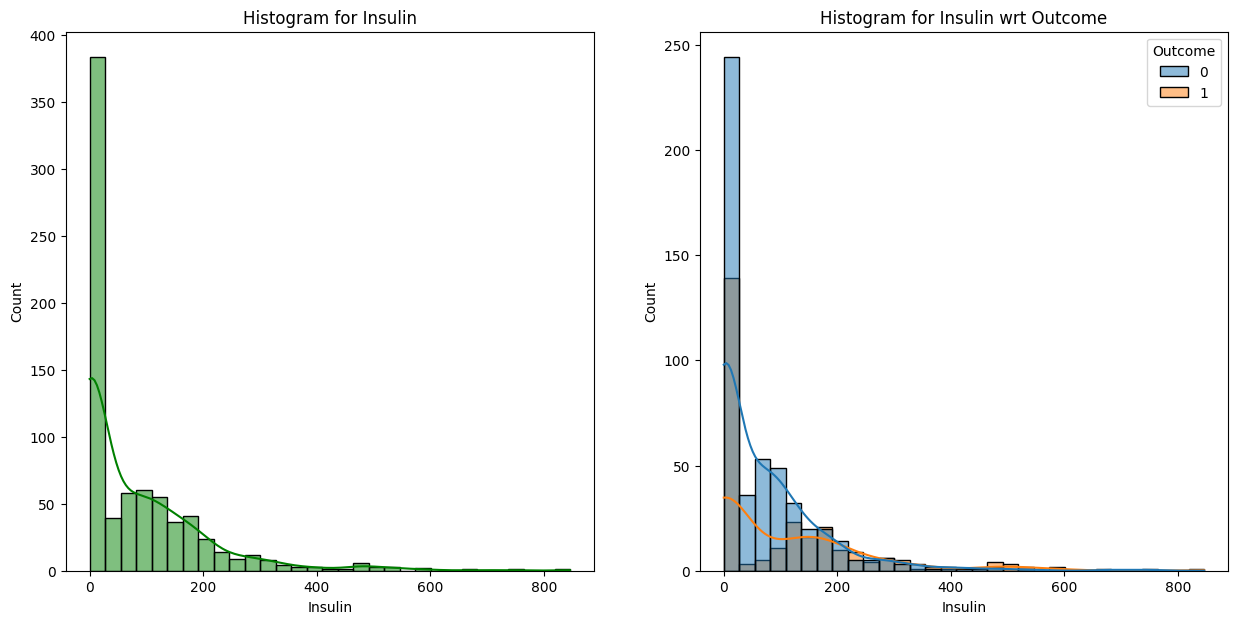

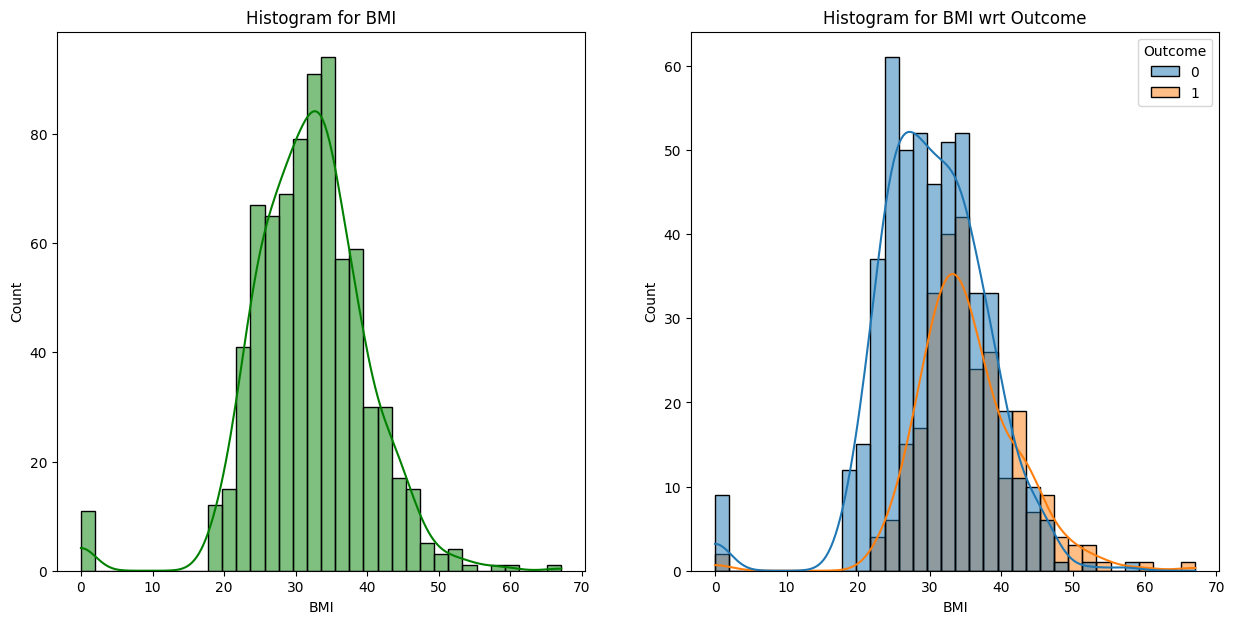

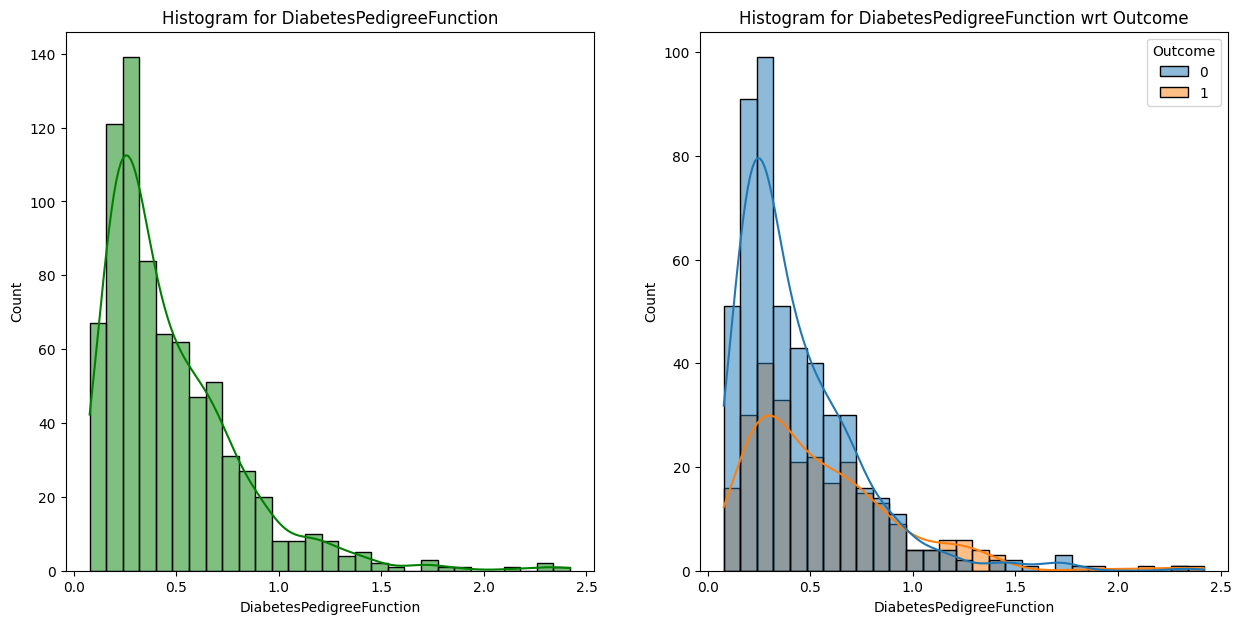

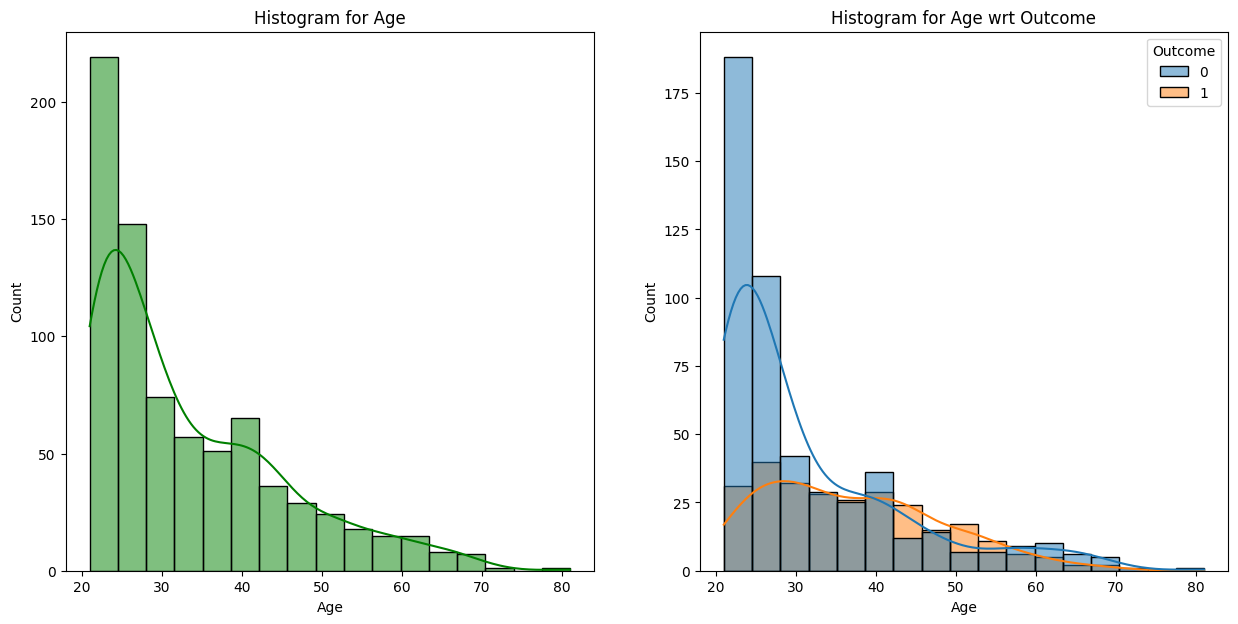

In [8]:
for i in df.columns:
    if i != 'Outcome':
        fig, ax = plt.subplots(1,2,figsize=(15,7))
        plt.subplot(121)
        sns.histplot(data=df,x=i,kde=True,bins='fd',color='g')
        plt.title(f'Histogram for {i}')
        plt.subplot(122)
        sns.histplot(data=df,x=i,kde=True,bins='fd',hue='Outcome')
        plt.title(f'Histogram for {i} wrt Outcome')
        plt.show()


In [9]:
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


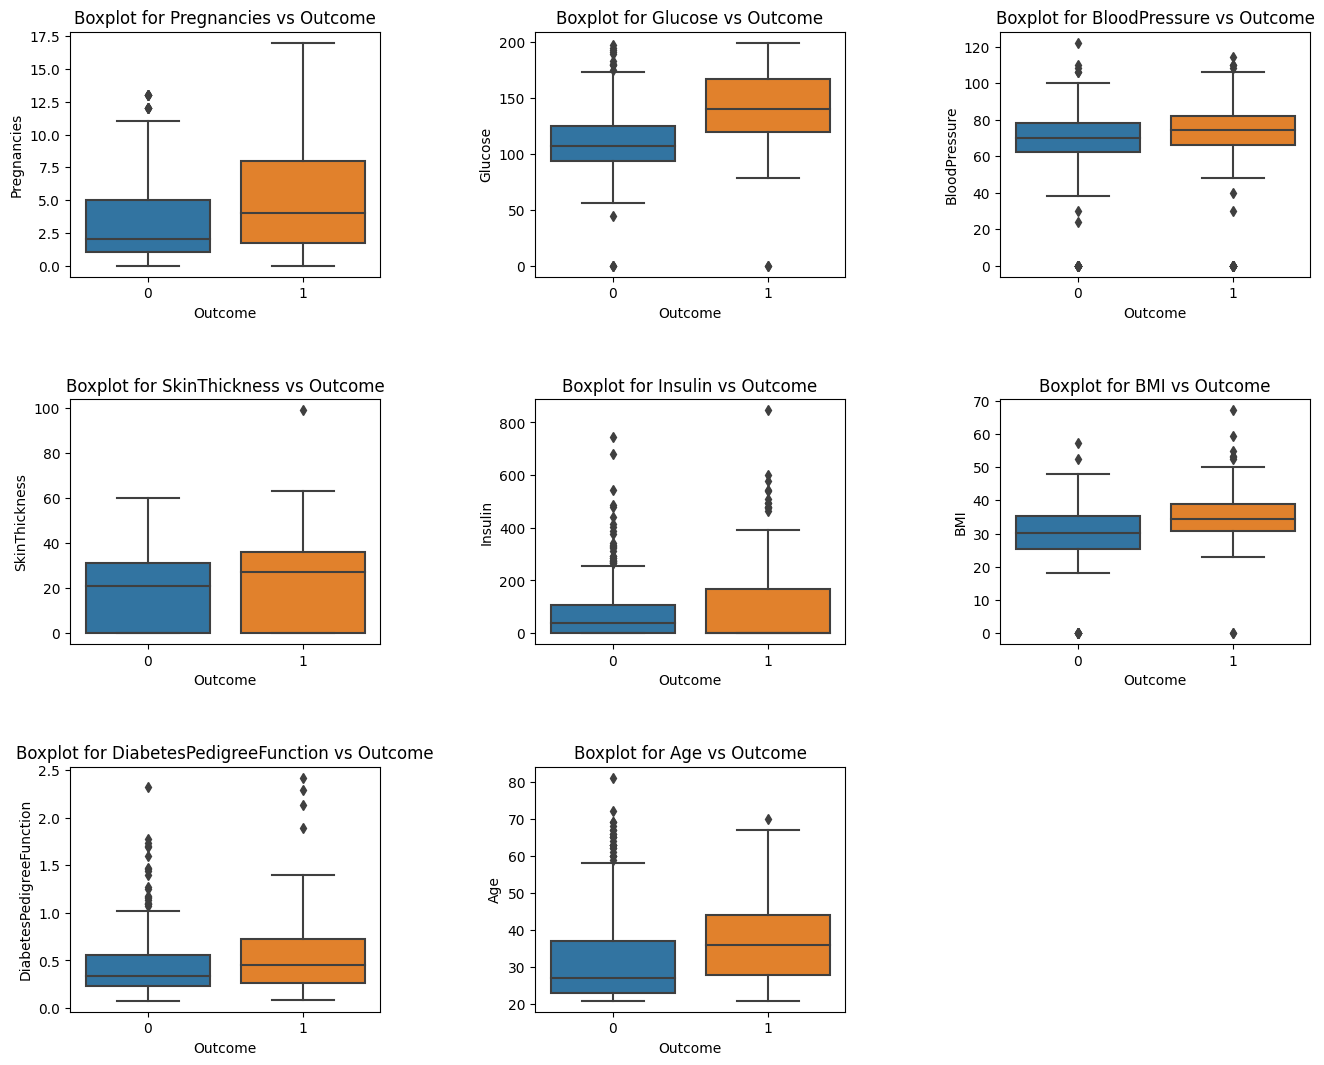

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize counter for subplots
x = 1
plt.figure(figsize=(16,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
for i in df.columns:
    if i != 'Outcome':
        plt.subplot(3,3,x)
        x = x+1
        sns.boxplot(data=df,x='Outcome',y=i)
        plt.title(f'Boxplot for {i} vs Outcome')
plt.show()

Question 2 : Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Answer :
Need to replace 0 values with Median as discussed in Univariate analysis of above

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
cols_zero_val = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [16]:
print('Zero Values in the Data which dont make sense:')
for i in cols_zero_val:
    print(f'{i}:{len(df[df[i]==0])}')

Zero Values in the Data which dont make sense:
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11


In [17]:
for i in cols_zero_val:
    df[i] = df[i].replace(0,df[i].median())

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There is no need to remove Outliers in a Decesion Tree algorithm as it is fairly capable of handling it.

In [21]:
import numpy as np
IQR = []
upper = []
lower = []
maxi = []
mini = []

In [23]:
for i in df.columns:
    q1=np.percentile(df[i],25)
    q3=np.percentile(df[i],75)
    IQR.append(q3-q1)
    upper.append(q3+1.5*(q3-q1))
    lower.append(q3-1.5*(q3-q1))
    maxi.append(df[i].max())
    mini.append(df[i].min())
df_iqr = pd.DataFrame([IQR,upper,lower,maxi,mini]).T
df_iqr.columns = ['IQR','upper','lower','max','min']
df_iqr.index = df.columns   
df_iqr    

,IQR,upper,lower,max,min
Pregnancies,5.0000,13.500,-1.5000,17.00,0.000
Glucose,40.5000,201.000,79.5000,199.00,44.000
BloodPressure,16.0000,104.000,56.0000,122.00,24.000
SkinThickness,9.0000,45.500,18.5000,99.00,7.000
Insulin,96.7500,272.375,-17.8750,846.00,14.000
BMI,9.1000,50.250,22.9500,67.10,18.200
DiabetesPedigreeFunction,0.3825,1.200,0.0525,2.42,0.078
Age,17.0000,66.500,15.5000,81.00,21.000
Outcome,1.0000,2.500,-0.5000,1.00,0.000


In [27]:
X = df.drop(labels=['Outcome'],axis=1)
Y = df[['Outcome']]



In [31]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [30]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


Question 3 : Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


Question 3 : Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility

In [33]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [34]:
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25, random_state=42)


xtest.shape

(192, 8)

In [37]:
xtrain.shape

(576, 8)

Question 4 : Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [38]:
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':list(range(1,13)),
    'max_features':['sqrt','log2']
}

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc,param_grid=parameters,cv=5,scoring='roc_auc')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [43]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [44]:
gscv.best_score_

0.7801058704453441

In [45]:
dtc_best = gscv.best_estimator_

In [46]:
dtc_best.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

Question 5 : Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [47]:
ypred_test = dtc_best.predict(xtest)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.74      0.85      0.80       123
           1       0.65      0.48      0.55        69

    accuracy                           0.72       192
   macro avg       0.70      0.67      0.67       192
weighted avg       0.71      0.72      0.71       192



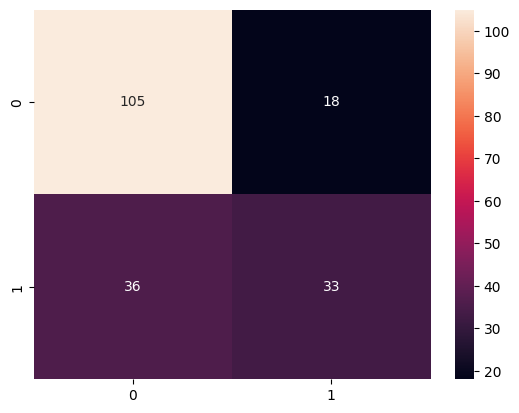

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf, annot=True,fmt='d')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
acc_test = accuracy_score(ytest, ypred_test)
print(f'Accuracy Score for test data is {acc_test:.4f}')

Accuracy Score for test data is 0.7188


In [52]:
from sklearn.metrics import roc_auc_score
ypred_prob = dtc_best.predict_proba(xtest)[:,-1]
auc = roc_auc_score(ytest,ypred_prob)
print(f'ROC-AUC Score for the model is : {auc:.4f}')

ROC-AUC Score for the model is : 0.7689


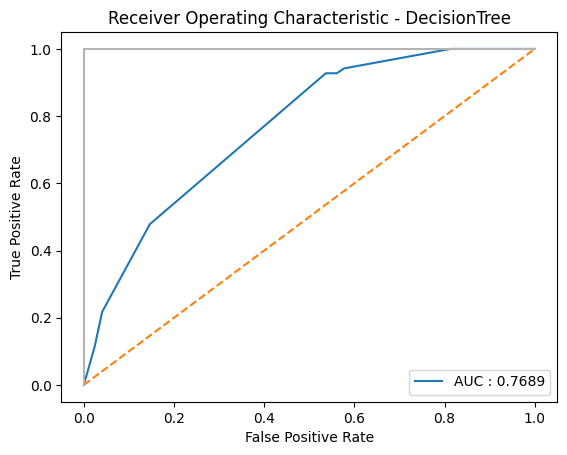

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(ytest,ypred_prob)
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr, label=f'AUC : {auc:.4f}')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Question 6 : Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

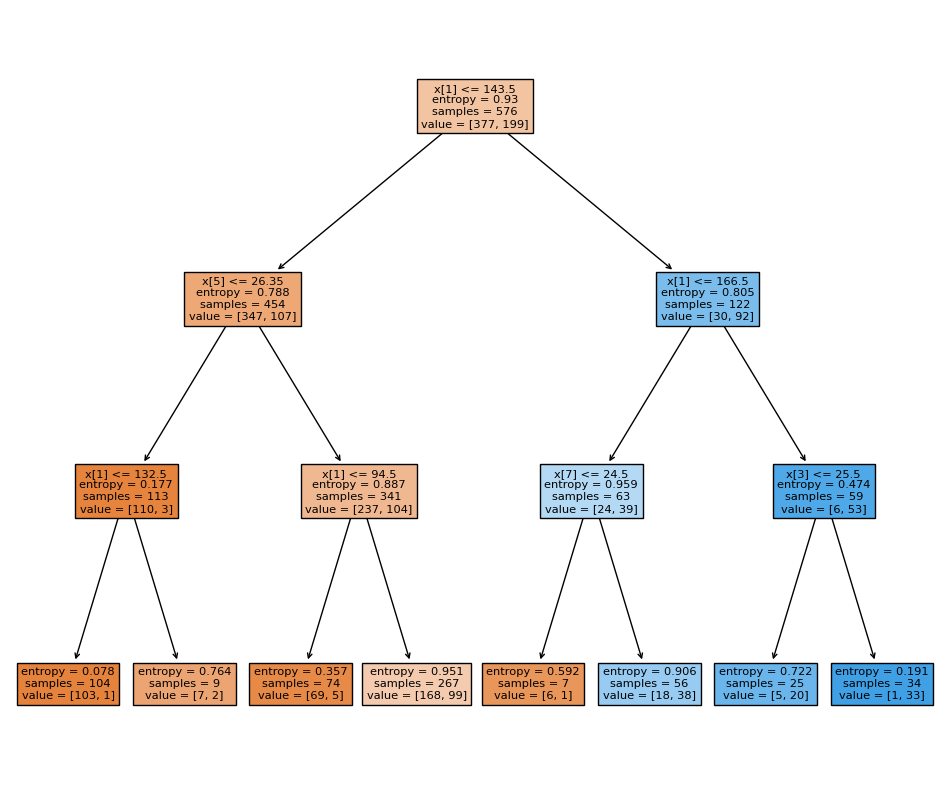

In [54]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtc_best,filled=True)
plt.show()

In [55]:
imp = dtc_best.feature_importances_
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

Glucose                     0.726011
BMI                         0.218310
Age                         0.034355
SkinThickness               0.021324
Pregnancies                 0.000000
BloodPressure               0.000000
Insulin                     0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64

<Axes: title={'center': 'Feature Importances'}, ylabel='Importance'>

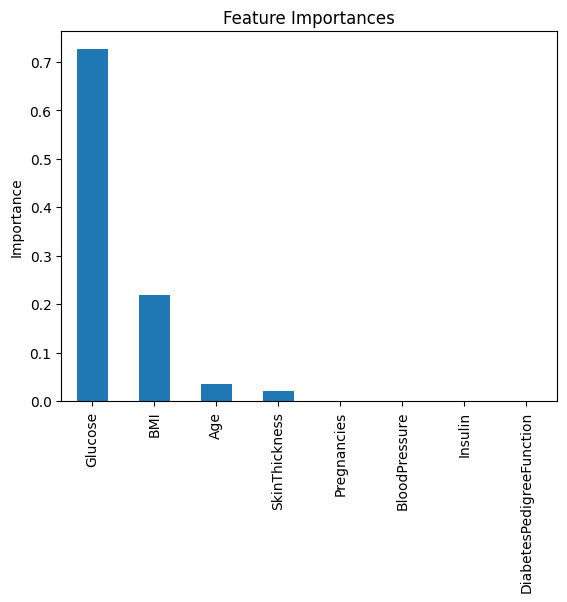

In [56]:
imp.plot(kind='bar',ylabel='Importance',title='Feature Importances')

Question 7 : Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [57]:
patient_data = {
    'Pregnancies':[3],
    'Glucose':[200],
    'BloodPressure':[80],
    'SkinThickness':[45],
    'Insulin':[512],
    'BMI':[31],
    'DiabetesPedigreeFunction':[0.160],
    'Age':[55]
}

In [58]:
df_data = pd.DataFrame(patient_data)
df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,200,80,45,512,31,0.16,55


In [60]:
pred = dtc_best.predict(df_data)[0]
pred

1

In [61]:
if pred==1:
    print('Patient is Diabetic')
    print(f'Probbaibility of diabetic : {dtc_best.predict_proba(df_data)[0][1]}')
else:
    print('Patient is non Diabetic')
    print(f'Probaibility of diabetic : {dtc_best.predict_proba(df_data)[0][1]}')

Patient is Diabetic
Probbaibility of diabetic : 0.9705882352941176


In [62]:
%pip install lime

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     --------- --------------------------- 71.7/275.7 kB 787.7 kB/s eta 0:00:01
     --------- --------------------------- 71.7/275.7 kB 787.7 kB/s eta 0:00:01
     ------------------------- ---------- 194.6/275.7 kB 985.7 kB/s eta 0:00:01
     ------------------------- ---------- 194.6/275.7 kB 985.7 kB/s eta 0:00:01
     -------------------------------- --- 245.8/275.7 kB 838.1 kB/s eta 0:00:01
     ---------------------------------- - 266.2/275.7 kB 911.0 kB/s eta 0:00:01
     ------------------------------------ 275.7/275.7 kB 771.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'

In [63]:
from lime.lime_tabular import LimeTabularExplainer
features = list(xtrain.columns)
explainer = LimeTabularExplainer(xtrain.values,
                                 feature_names=features,
                                 class_names=[0,1],
                                 verbose=True,
                                 mode='classification')

In [64]:
from warnings import filterwarnings
filterwarnings('ignore')
exp = explainer.explain_instance(df_data.values.flatten(),dtc_best.predict_proba,num_features=xtrain.shape[1])

Intercept 0.18790682235917222
Prediction_local [0.78210891]
Right: 0.9705882352941176


In [65]:
exp.show_in_notebook(show_table=True)
